In [154]:
from matplotlib import style
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import scipy.stats
import scipy.optimize
style.use('ggplot')

In [155]:
def setText(plot, title, xlab, ylab):
  plot.title(title);plot.xlabel(xlab);plot.ylabel(ylab)

def setTextSub(plot, title, xlab, ylab):
  plot.set_title(title);plot.set_xlabel(xlab);plot.set_ylabel(ylab)

In [156]:
# copied from the manuel and use mutli-curser to edit
labels = [["C3_C","MEOH_2","DPPH_1","DPPH_3","C3_B",
          "C5_B","C3_C","C4_B","C3_A","T2","C2_A","C1_BK"],
          ["DPPH_2","C1_B","MEOH_3","C2_A"  ,"C4_BK","T1",
             "C3_BK","C4_BK","C1_A","C2_BK","C6_C","C4_A"],
          ["C6_BK","C6_A","C5_C","C2_BK","C3_BK","T4",
             "T4","C2_C","C5_A","C3_B","C1_C","C1_B"],
          ["C3_A","C6_B","C1_BK","C4_A","T2","C2_C",
             "C6_A","T5","T1","MEOH_2","DPPH_2","T3"],
          ["MEOH_1","T6","C2_B","C4_B","C4_C","C5_BK",
             "C4_C","C5_C","DPPH_1","DPPH_3","MEOH_3","C6_B"],
          ["T3","C1_A","C5_A","C1_C","T5","C6_C","C5_B",
             "C2_B","C6_BK","T6","C5_BK","MEOH_1"]
          ] # removed space
# Since we are group 1
labels = [i[:6] for i in labels]
labels = np.array(labels).flatten()

# [i.split("") for i in labels]

In [157]:
# Trolox Std  T1-T6
dataPoints = ["T"+ str(i) for i in range(1,7)]
D10 = np.array(pd.read_csv("10.csv")[[str(i) for i in range(1,7)]]).flatten()
D15 = np.array(pd.read_csv("15.csv")[[str(i) for i in range(1,7)]]).flatten()
D20 = np.array(pd.read_csv("20.csv")[[str(i) for i in range(1,7)]]).flatten()
concentrations =  [50, 12.5, 3.1, 0.78, 0.20, 0.05]

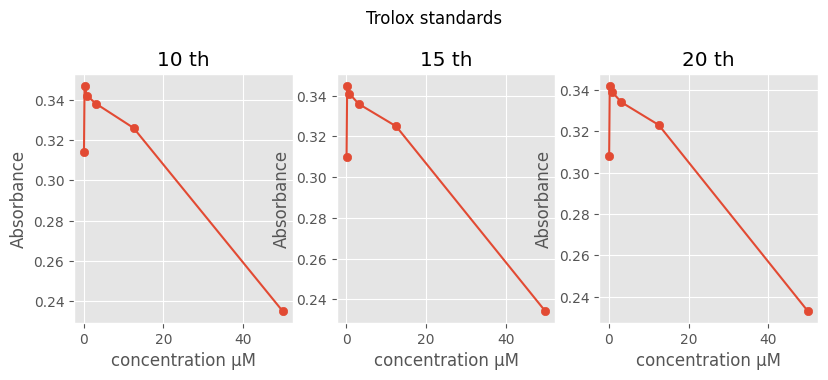

In [158]:
fig, axs = plot.subplots(1, 3, figsize=(8*1.2,3*1.2))
plot.suptitle("Trolox standards\n");fig.subplots_adjust(top=0.8)
for id, frame in enumerate([D10, D15, D20]):
    data = [frame[np.where(labels==i)] for i in dataPoints]
    axs[id].plot(concentrations, data)
    setTextSub(axs[id],f"{[10,15,20][id]} th","concentration µM","Absorbance")#kunnotmin
    axs[id].scatter(concentrations, data)

There is a outlier

x*-0.0022118004339408757+0.3470523345783567
r^2=0.9929665322673977  p-value=0.00025087765857344284
x*-0.0021986920467934137+0.3454777832951011
r^2=0.9923670831063769  p-value=0.00028367566739416077
x*-0.002170713404587707+0.34310521969548996
r^2=0.9924527988734789  p-value=0.00027890348214154793


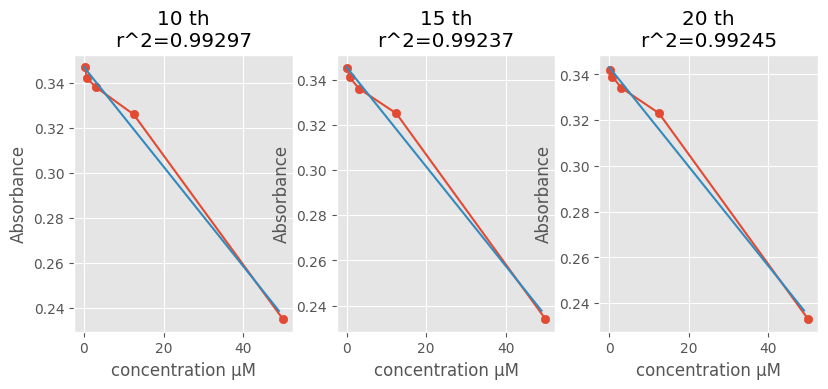

In [159]:
fig, axs = plot.subplots(1, 3, figsize=(8*1.2,3*1.2))
for id, frame in enumerate([D10, D15, D20]):
    data = [frame[np.where(labels==i)] for i in dataPoints]
    axs[id].plot(concentrations[:-1], data[:-1])
    axs[id].scatter(concentrations[:-1], data[:-1])
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(concentrations[:-1], np.array(data[:-1]).flatten())
    axs[id].plot(np.arange(0,50),np.arange(0,50)*slope+intercept)
    setTextSub(axs[id],f"{[10,15,20][id]} th\nr^2={r_value**2:.{5}f}","concentration µM","Absorbance")
    print(f"x*{slope}+{intercept}\nr^2={r_value**2}  p-value={p_value}")

### DFs2

In [160]:
samples = []
for i in range(1,7): # Sample number
    row = []
    for j in ['A','B','C']: # Replicate
        row.append(D10[np.where(labels==f"C{i}_{j}")])
    samples.append(row)

In [161]:
samples

[[array([0.181]), array([0.178]), array([0.178])],
 [array([0.123]), array([0.177]), array([0.114])],
 [array([0.095]), array([0.097]), array([0.103])],
 [array([0.084]), array([0.082]), array([0.087])],
 [array([0.068]), array([0.083]), array([0.07])],
 [array([0.062]), array([0.062]), array([0.067])]]

In [162]:
sample_blanks = []
for i in range(1,7): # Sample number
    sample_blanks.append(D10[np.where(labels==f"C{i}_BK")])

In [163]:
sample_blanks

[array([0.18]),
 array([0.135]),
 array([0.102]),
 array([0.077]),
 array([0.062]),
 array([0.053])]

In [164]:
MeOH_B = []
DPPH_B = []
for i in range(1,4):
    MeOH_B.append(D10[np.where(labels==f"MEOH_{i}")])
    DPPH_B.append(D10[np.where(labels==f"DPPH_{i}")])
    

In [165]:
MeOH_B,DPPH_B

([array([0.055]), array([0.039]), array([0.044])],
 [array([0.327]), array([0.328]), array([0.324])])

### DF 3

In [166]:
sampleMeans = np.mean(samples, axis=1)
real = sampleMeans - sample_blanks;real

array([[-0.001     ],
       [ 0.003     ],
       [-0.00366667],
       [ 0.00733333],
       [ 0.01166667],
       [ 0.01066667]])

In [167]:
correctDPPH = np.array(DPPH_B) - MeOH_B;correctDPPH

array([[0.272],
       [0.289],
       [0.28 ]])

In [168]:
rem = real/np.mean(correctDPPH)

In [169]:
rem

array([[-0.00356718],
       [ 0.01070155],
       [-0.01307967],
       [ 0.02615933],
       [ 0.04161712],
       [ 0.03804994]])

In [174]:
# https://medium.com/@erika.dauria/looking-at-r-squared-721252709098
def R2(f, x, y):
    SSRES = np.sum(np.square(y-f(x)))
    print(SSRES)
    SSTOT = np.sum(np.square(y-np.mean(y)))
    return 1-SSRES/SSTOT

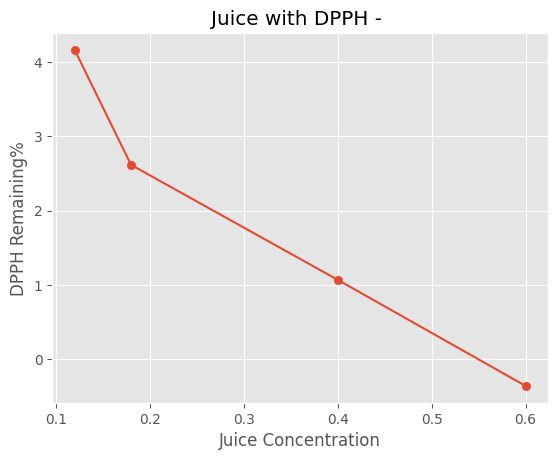

In [170]:
rem = real/np.mean(correctDPPH)
juice_concentrations = [0.6, 0.4, 0.27, 0.18, 0.12, 0.079]
juice_concentrations = np.delete(juice_concentrations, 2)
rem = np.delete(rem, 2)
juice_concentrations = np.delete(juice_concentrations, 4)
rem = np.delete(rem, 4)
plot.plot(juice_concentrations, rem*100)
plot.scatter(juice_concentrations, rem*100)
setText(plot, "Juice with DPPH - ", "Juice Concentration", "DPPH Remaining%")

/tmp/ipykernel_73110/603977158.py:3: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x)+c #sicoengxiangshi? kunyuneixnyachijianguo forgotreturn


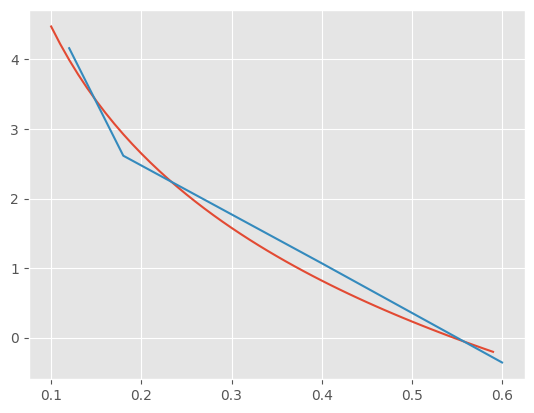

In [171]:
def f(x,a,b,c):
    # print(a,b,c,x)
    return a*np.log(b*x)+c #sicoengxiangshi? kunyuneixnyachijianguo forgotreturn
scipy.optimize.curve_fit(f, juice_concentrations, rem*100)
X = np.arange(0.1,0.6,0.01)
plot.plot(X, f(X, -2.63528503,  1.72724287, -0.15380968))
plot.plot(juice_concentrations, rem*100)

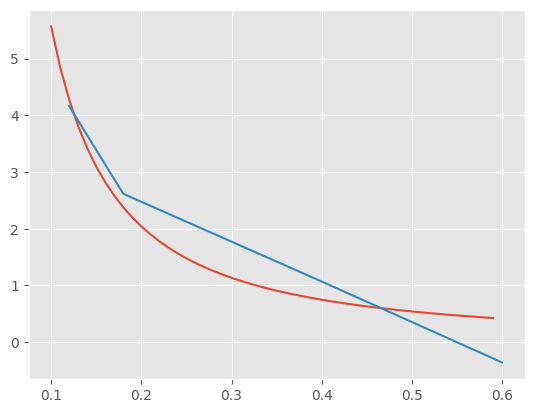

In [172]:
def f(x,a,b):
    # print(a,b,c,x)
    return a/(x**b) #sicoengxiangshi? kunyuneixnyachijianguo forgotreturn
vs = scipy.optimize.curve_fit(f, juice_concentrations, rem*100)
X = np.arange(0.1,0.6,0.01)
plot.plot(X, f(X, vs[0][0], vs[0][1]))
plot.plot(juice_concentrations, rem*100)

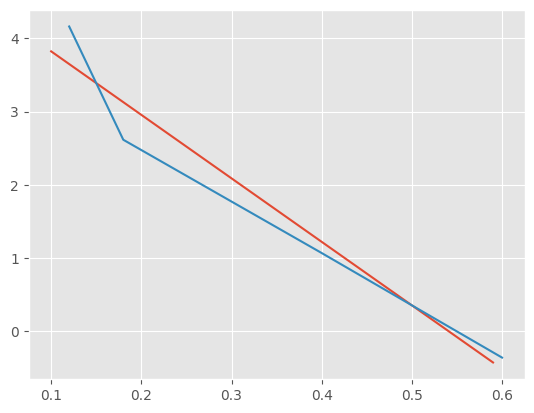

In [173]:
def f(x,a,b):
    # print(a,b,c,x)
    return a*x+b #sicoengxiangshi? kunyuneixnyachijianguo forgotreturn
vs = scipy.optimize.curve_fit(f, juice_concentrations, rem*100)
X = np.arange(0.1,0.6,0.01)
plot.plot(X, f(X, vs[0][0], vs[0][1]))
plot.plot(juice_concentrations, rem*100)

1


0.9497586308866136

In [152]:
# a = lambda x: f(X, vs[0][0], vs[0][1])
# a([1,2])
# vs[0][1]

4.688755342340369